In [1]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../codes')
import os
import cv2
import matplotlib.pyplot as plt
from dataset import VideoDataset
from utils.img_utils import add_bb_on_image

/home/wesley.passos/miniconda3/envs/mosquitoes/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
#make matplotlib figures appear inline in the notebook
#rather than in a new window.
%matplotlib inline
#sns.set()
# set default size of plots
plt.rcParams['figure.figsize'] = (12.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


In [4]:
video_path = '../data/CEFET/VideoDataSet'
annot_path = '../data/CEFET/zframer-marcacoes'

In [5]:
videos = VideoDataset(video_path, annot_path)

In [6]:
len(videos)

62

In [7]:
sample_idx = 0

In [8]:
sample = videos[sample_idx]
sample.keys()

dict_keys(['frames', 'bboxes'])

In [9]:
frame_idx = 0
frame = sample['frames'][frame_idx]
frame.shape

(1080, 1440, 3)

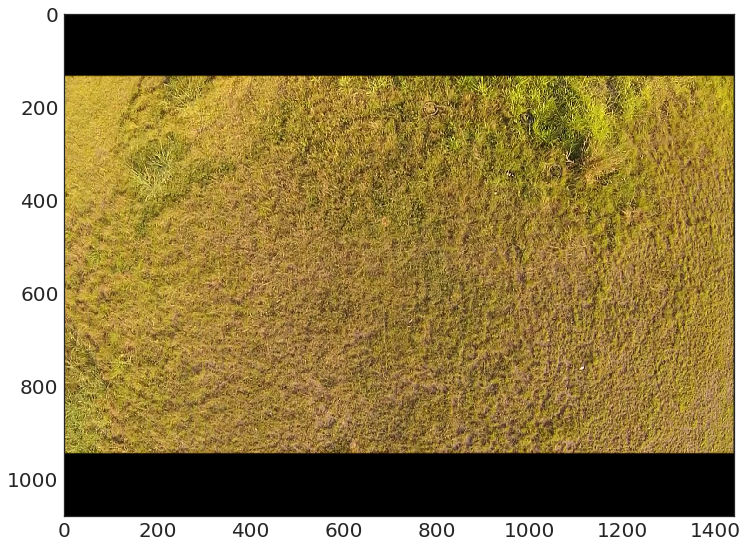

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
bboxes = sample['bboxes'][frame_idx]
bboxes

{'Object 1': [1039, 325, 1070, 355],
 'Object 2': [1147, 348, 1172, 372],
 'Object 3': [771, 190, 805, 221],
 'Object 4': [979, 213, 1008, 237]}

In [12]:
for object_name, bb in bboxes.items():
    frame = add_bb_on_image(frame, bb)    

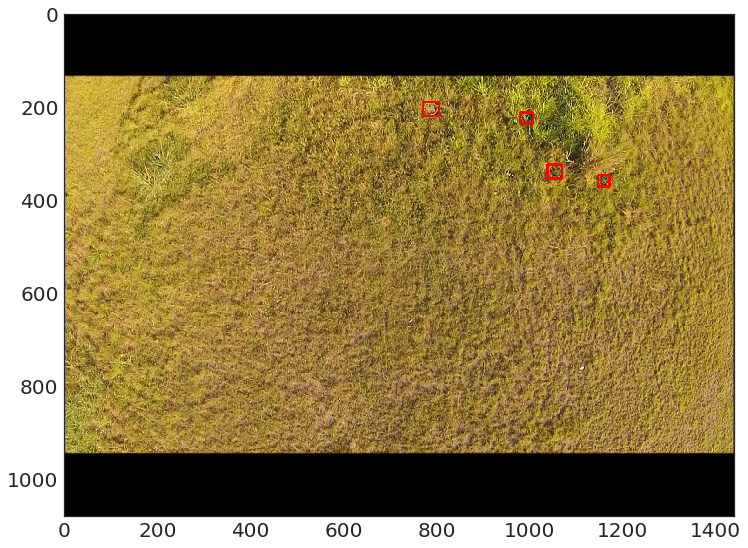

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()